* For this final project, I would like to focus on chronic disease, which is the topic of our team project in SPHG 713 :)
* This dataset comes from Youth Risk Behavior Surveillance System of CDC and focuses on teenagers' nutrition, physical activity and obesity.

In [1]:
library("tidyverse")

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
install.packages("readxl")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library("readxl")

In [4]:
dataset <- read_excel("Nutrition__Physical_Activity__and_Obesity_-_Youth_Risk_Behavior_Surveillance_System_20241201.xlsx")

In [5]:
head(dataset)

YearStart,YearEnd,LocationAbbr,Class,Topic,Question,Data_Value_Alt,Sample_Size,Total,Gender,Grade,Race/Ethnicity,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
2019,2019,AK,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily,9.6,130,NA,NA,NA,Asian,2,Race/Ethnicity,Asian,RACE
2019,2019,AZ,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,13.3,1739,Total,NA,NA,NA,4,Total,Total,OVR
2019,2019,DC,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,17.1,8978,Total,NA,NA,NA,11,Total,Total,OVR
2019,2019,IL,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who participate in daily physical education,65.9,876,NA,NA,10th,NA,17,Grade,10th,GRADE
2019,2019,MD,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an overweight classification,16.7,2573,NA,NA,NA,2 or more races,24,Race/Ethnicity,2 or more races,RACE
2011,2011,RI,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have obesity,11.5,1199,NA,NA,9th,NA,44,Grade,9th,GRADE


In [6]:
glimpse(dataset)

Rows: 44,702
Columns: 16
$ YearStart                 <dbl> 2019, 2019, 2019, 2019, 2019, 2011, 2019, 20…
$ YearEnd                   <dbl> 2019, 2019, 2019, 2019, 2019, 2011, 2019, 20…
$ LocationAbbr              <chr> "AK", "AZ", "DC", "IL", "MD", "RI", "MT", "N…
$ Class                     <chr> "Physical Activity", "Obesity / Weight Statu…
$ Topic                     <chr> "Physical Activity - Behavior", "Obesity / W…
$ Question                  <chr> "Percent of students in grades 9-12 who achi…
$ Data_Value_Alt            <dbl> 9.6, 13.3, 17.1, 65.9, 16.7, 11.5, 12.2, 10.…
$ Sample_Size               <dbl> 130, 1739, 8978, 876, 2573, 1199, 1045, 649,…
$ Total                     <chr> NA, "Total", "Total", NA, NA, NA, NA, NA, NA…
$ Gender                    <chr> NA, NA, NA, NA, NA, NA, NA, "Female", NA, NA…
$ Grade                     <chr> NA, NA, NA, "10th", NA, "9th", "10th", NA, N…
$ `Race/Ethnicity`          <chr> "Asian", NA, NA, NA, "2 or more races", NA, …
$ LocationID   

In [7]:
colnames(dataset)

[1] "YearStart"                 "YearEnd"                  
 [3] "LocationAbbr"              "Class"                    
 [5] "Topic"                     "Question"                 
 [7] "Data_Value_Alt"            "Sample_Size"              
 [9] "Total"                     "Gender"                   
[11] "Grade"                     "Race/Ethnicity"           
[13] "LocationID"                "StratificationCategory1"  
[15] "Stratification1"           "StratificationCategoryId1"

* In the first chart, I want to focus on obesity as an important public health issue. By extracting all the information related to obesity from the table, I will calculate the average obesity percent for each year based on the survey data. Then, I will create a line chart to show the relationship between the year and Percent of students in grades 9-12 who have obesity

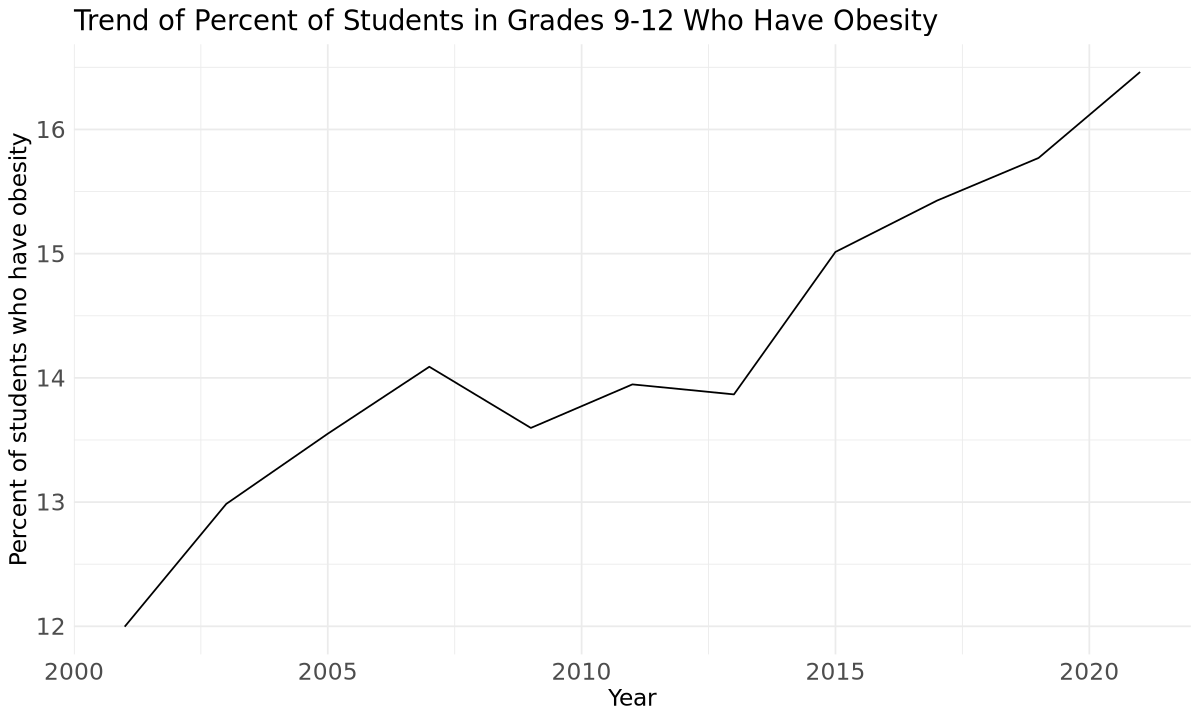

In [12]:
options(repr.plot.height = 6, repr.plot.width = 10)
dataset|>
  filter(grepl("Obesity", Class))|>
  group_by(YearStart)|>
  summarize(mean_value_obesity = mean(Data_Value_Alt, na.rm = TRUE)) |>
  ggplot(aes(x = YearStart, y = mean_value_obesity)) +
  geom_line() +labs( x = "Year",y = "Percent of students who have obesity",title = "Trend of Percent of Students in Grades 9-12 Who Have Obesity") +
  theme_minimal() + theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14),  
    axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14),plot.title = element_text(size = rel(1.5)))

* For the second chart, I would like to focus on the data of percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily in 2005 and make a bar chart to rank the value in the U.S. states.

In [9]:
library('dplyr')

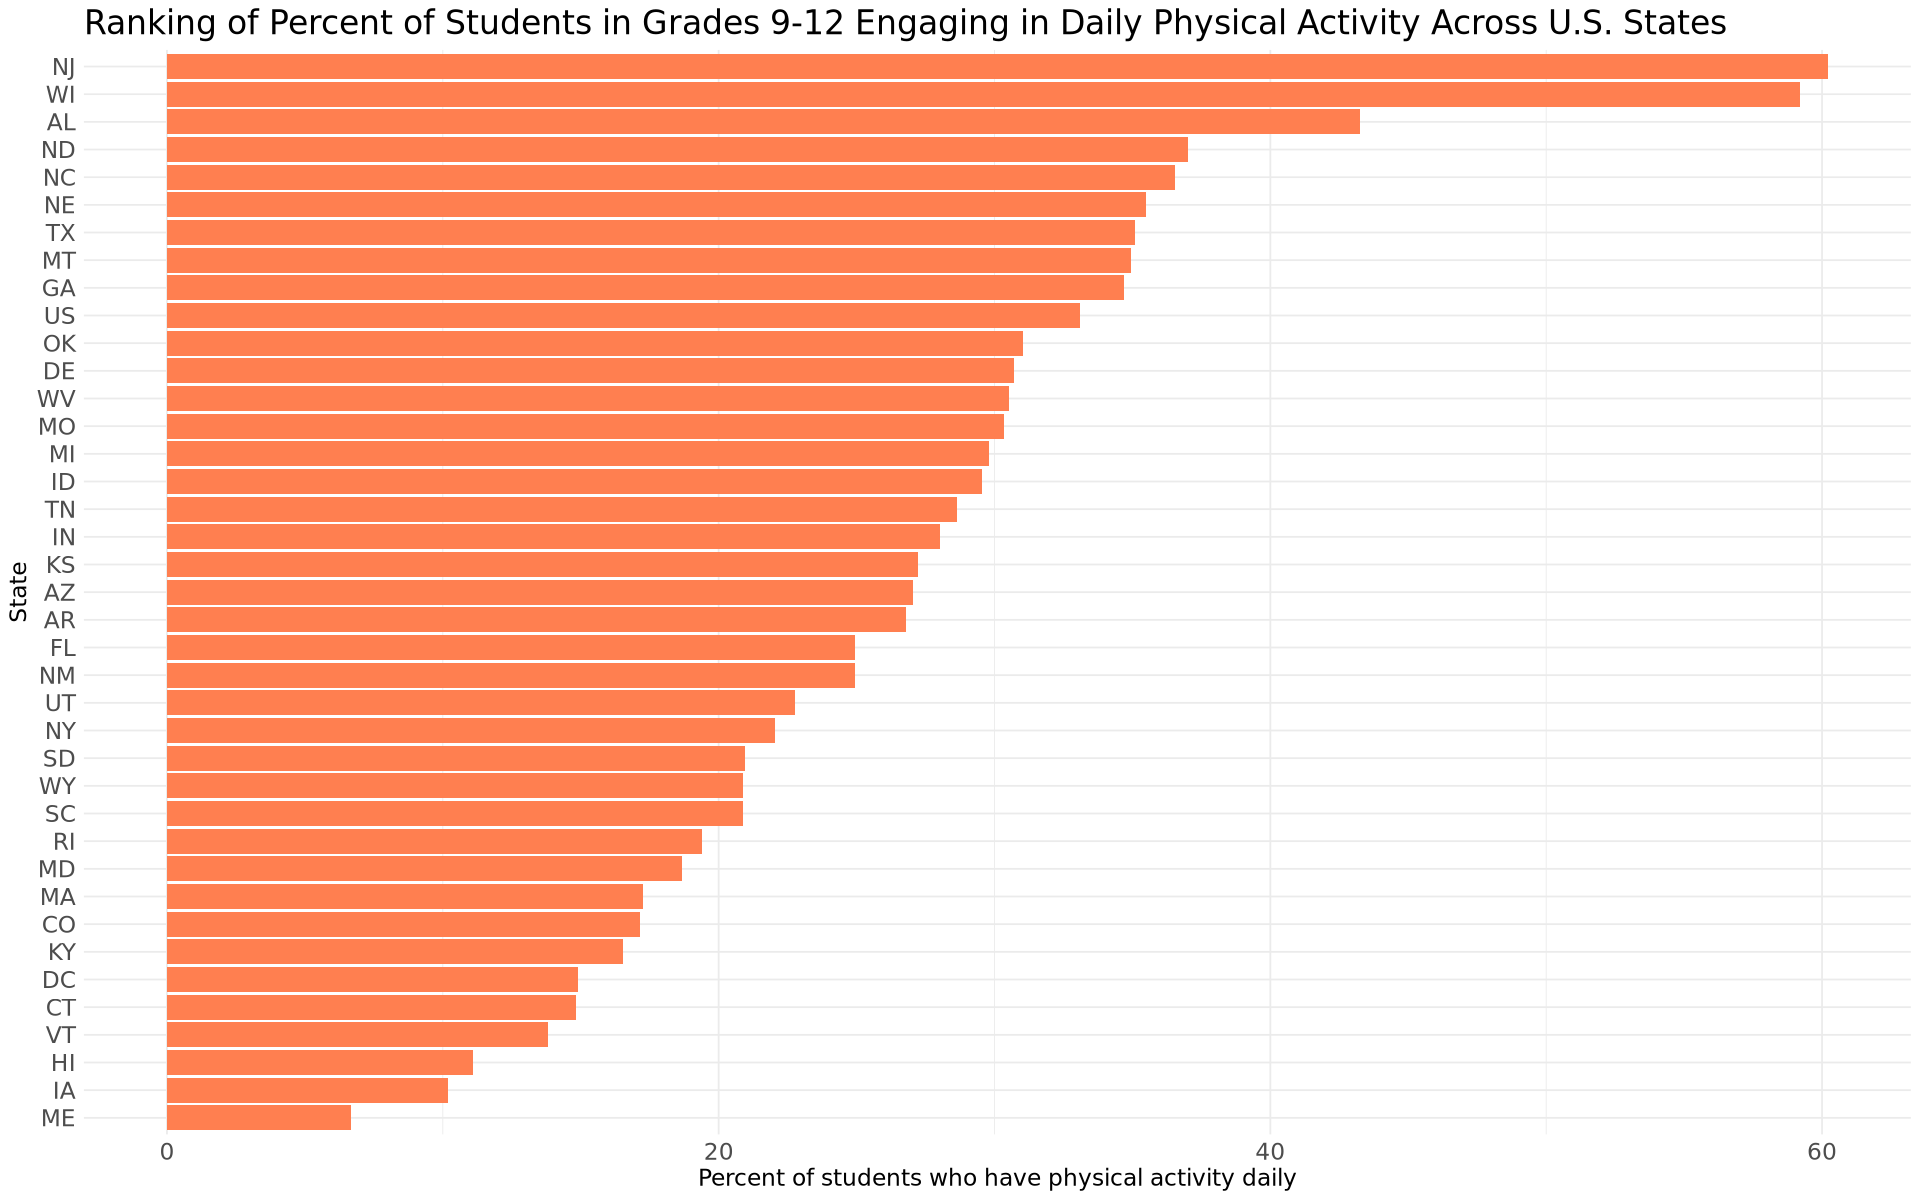

In [17]:
options(repr.plot.height = 10, repr.plot.width = 16)
dataset|>
filter(YearStart == 2005)|>
filter(Class == 'Physical Activity')|>
 group_by(LocationAbbr)|>
 summarize(mean_value_physical_activity = mean(Data_Value_Alt, na.rm = TRUE)) |>
mutate(state = reorder(LocationAbbr, mean_value_physical_activity))|>
ggplot(aes(x = mean_value_physical_activity, y = state)) +
  geom_bar(stat = "identity",fill = 'coral')+labs( x = "Percent of students who have physical activity daily",y = "State",title = "Ranking of Percent of Students in Grades 9-12 Engaging in Daily Physical Activity Across U.S. States") +
  theme_minimal() + theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14),  
    axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14),
                          plot.title = element_text(size = rel(1.8)))

* For the Last chart, I want to calculate the mean percents of those nutritious problems(including sugar drinks and vegetable and fruits) in North Carolina and make a chart to show the relationship between year and the mean percents from 2010.

`summarise()` has grouped output by 'YearStart'. You can override using the
`.groups` argument.


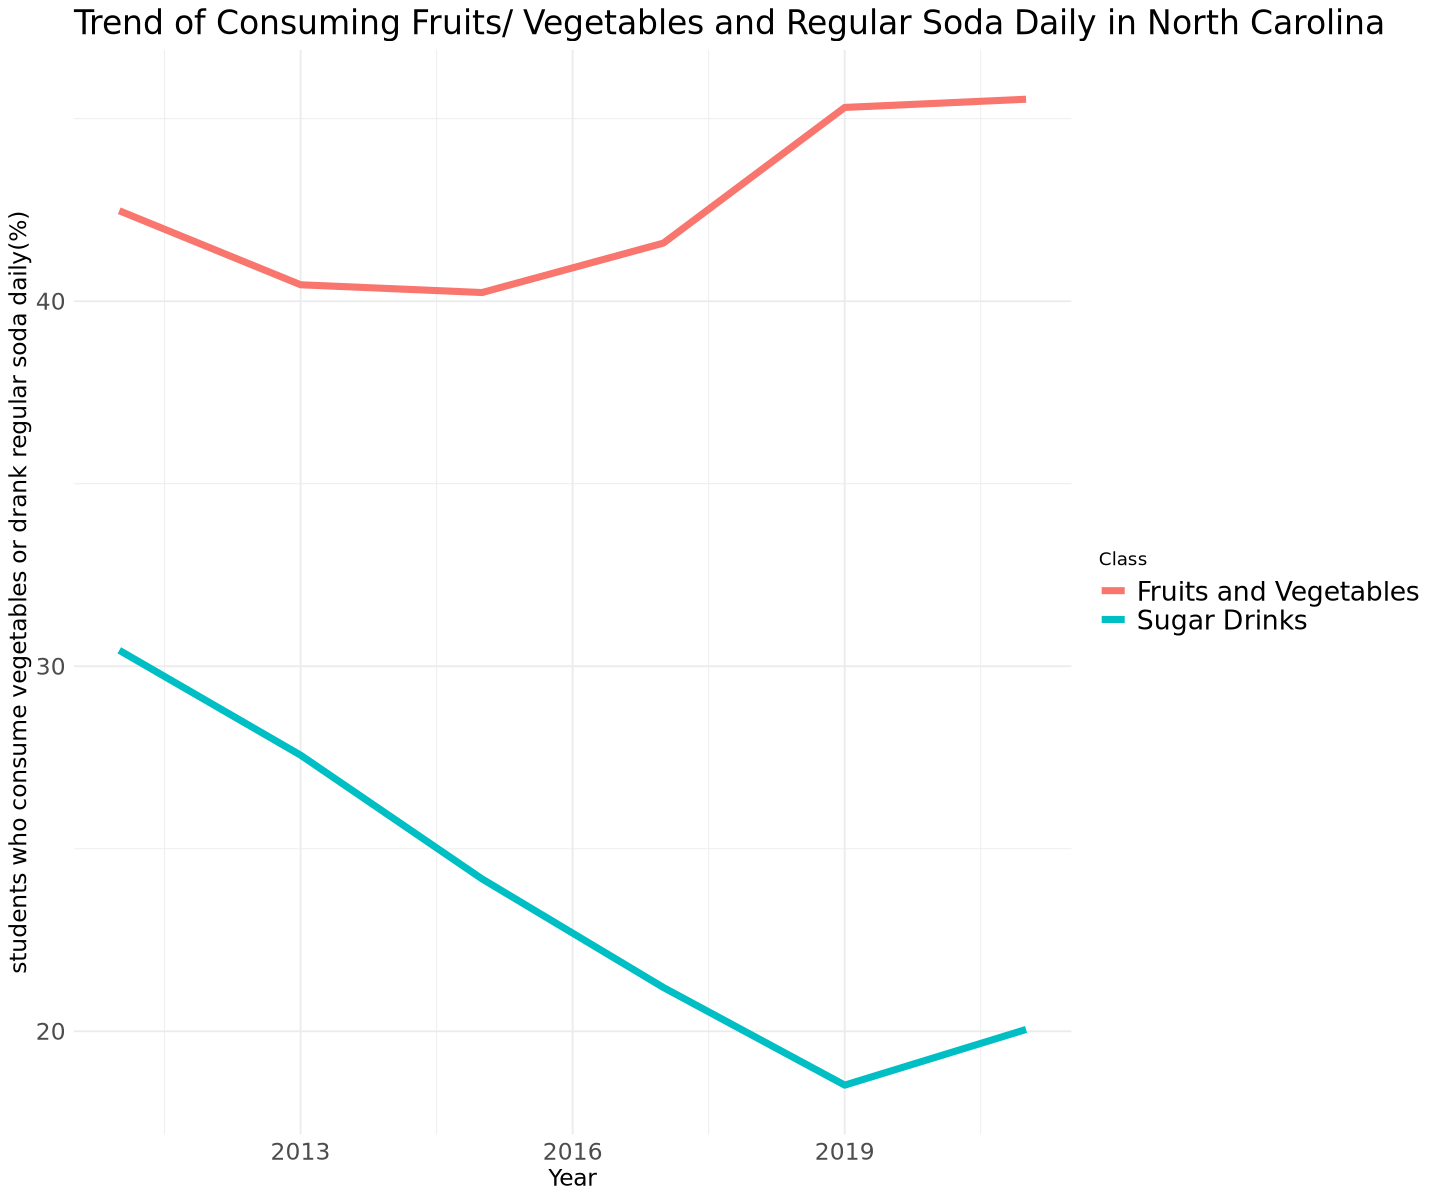

In [11]:
options(repr.plot.height = 10, repr.plot.width = 12)
dataset|>
filter(YearStart > 2010)|>
filter(LocationAbbr == 'NC')|>
filter(Class %in% c('Sugar Drinks', 'Fruits and Vegetables'))|>
group_by(YearStart, Class)|>
summarize(mean_value = mean(Data_Value_Alt, na.rm = TRUE))|>
ggplot(aes(x= YearStart, y= mean_value, color = Class))+geom_line(linewidth = 2)+
labs( y = "students who consume vegetables or drank regular soda daily(%)",x = "Year",title = "Trend of Consuming Fruits/ Vegetables and Regular Soda Daily in North Carolina") +
  theme_minimal() + theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14), legend.text = element_text(size = 16),
    axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14), 
                          plot.title = element_text(size = rel(1.8)))

* P.S. Y-axis means the percent of students in grades 9-12 who drank regular soda/pop at least one time or consume fruit/vegetables less than 1 time dailyper day